<a href="https://colab.research.google.com/github/Roumyajit/My-Project-Data-Science/blob/main/Copy_of_Flight_Price_Prediction_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

✅ Shape of merged dataset: (600414, 11)
airline                  0
flight                   0
source_city              0
departure_time           0
stops                    0
arrival_time             0
destination_city         0
class                    0
duration                 0
days_left           300261
price                    0
dtype: int64


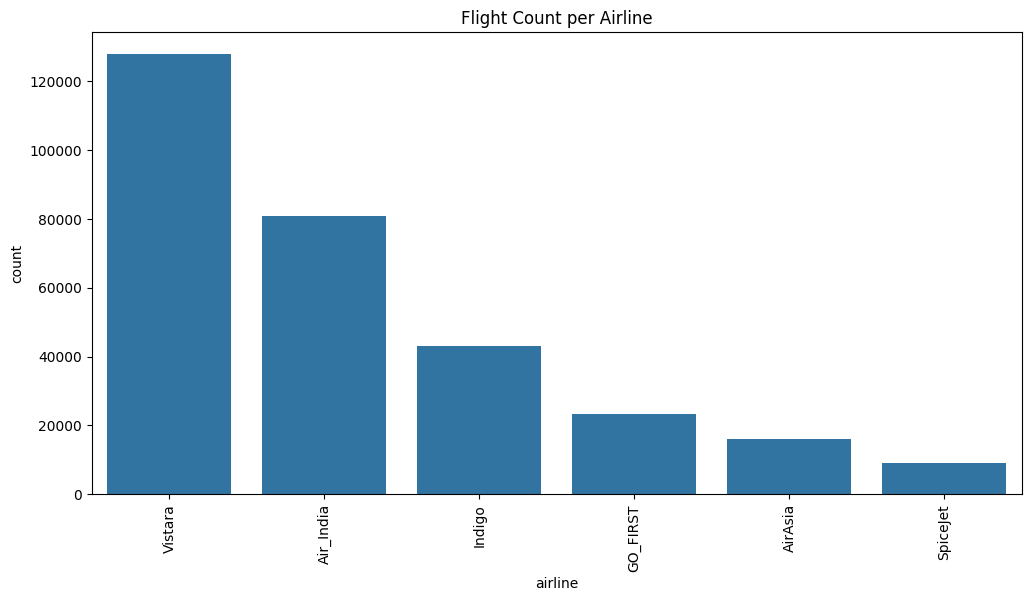

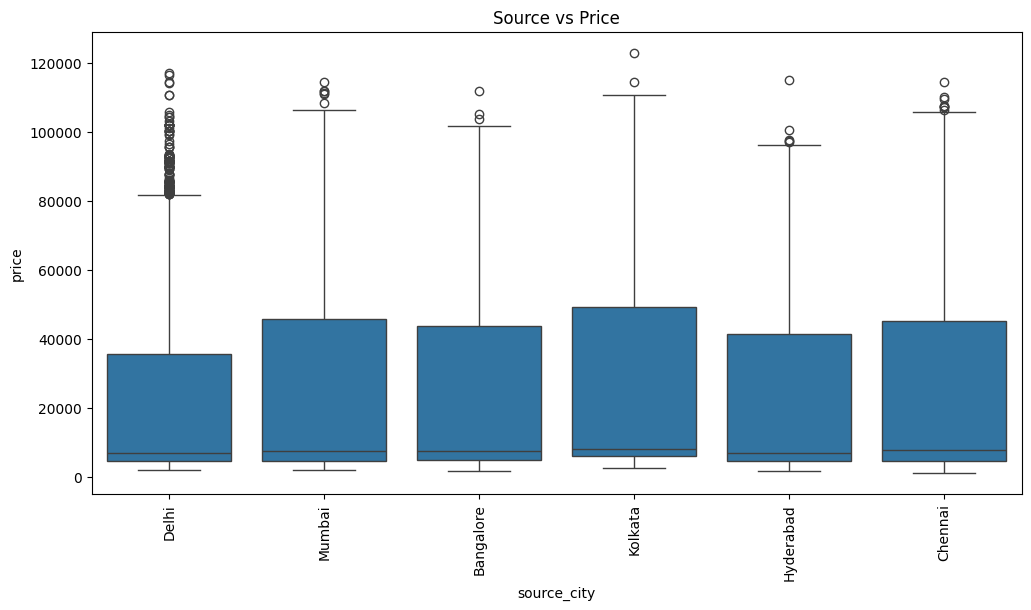

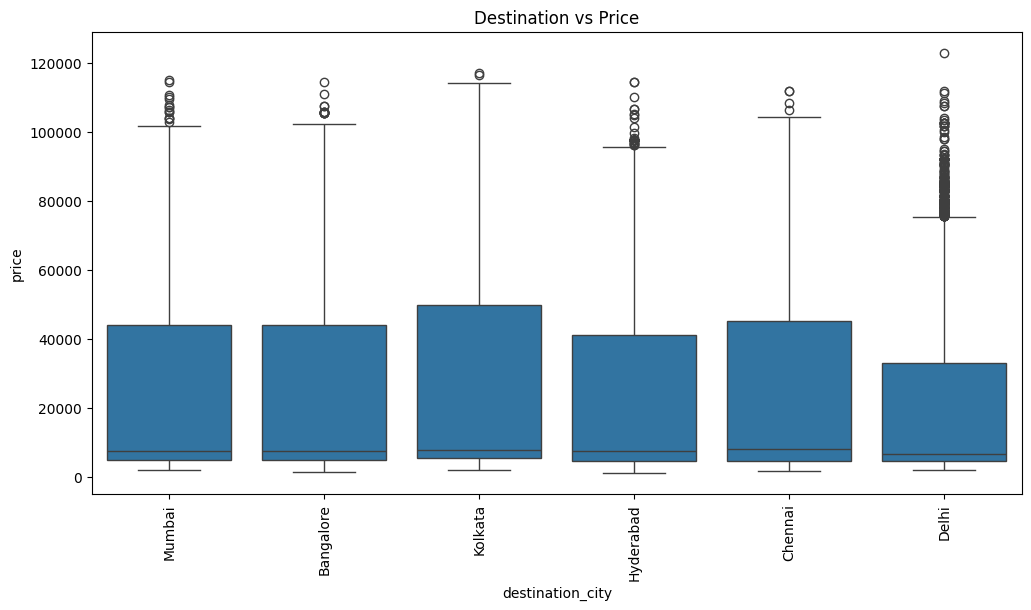

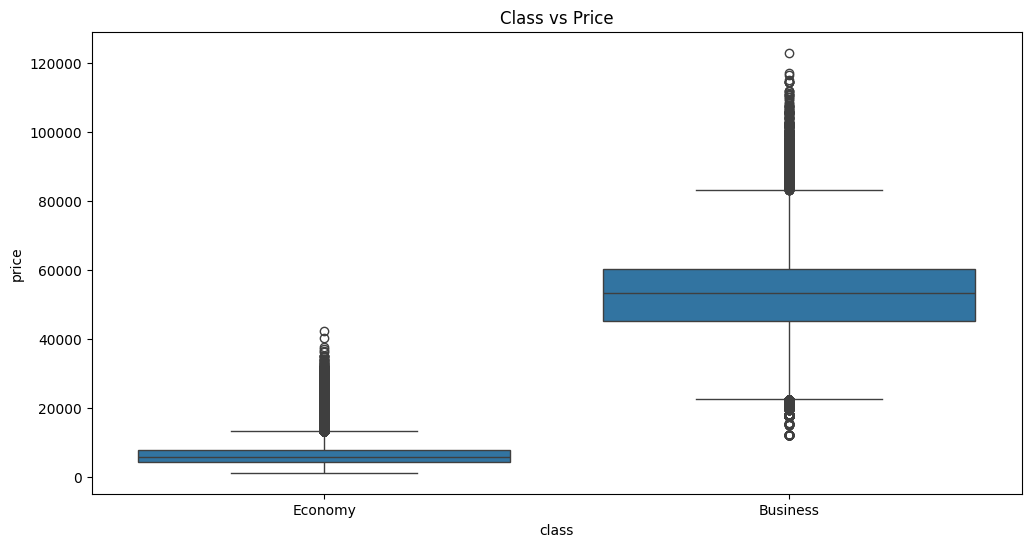


🔹 Random Forest Metrics
MAE: 862.9665722015187
MSE: 5378510.4673499195
RMSE: 2319.161587158152
R2 Score: 0.98956606125345


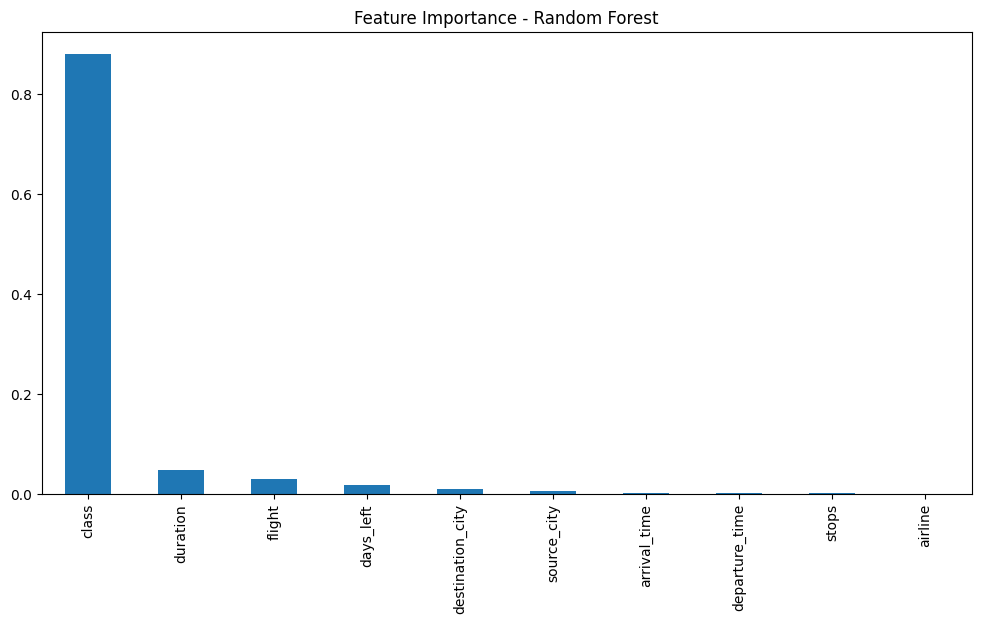


✈️ Sample Prediction Input:
        airline  flight  source_city  departure_time  stops  arrival_time  \
27131        1     748            2               4      0             1   

       destination_city  class duration  days_left  
27131                 4      1    19.75       40.0  
💰 Predicted Flight Price: 7194.48


In [ ]:
# Install & Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

# Load Datasets
df_clean = pd.read_csv('/content/Clean_Dataset.csv')
df_business = pd.read_csv('/content/business.csv')
df_economy = pd.read_csv('/content/economy.csv')

# Clean Dataset
df_clean = df_clean.rename(columns={
    'source_city': 'source_city',
    'departure_time': 'departure_time',
    'stops': 'stops',
    'arrival_time': 'arrival_time',
    'destination_city': 'destination_city',
    'class': 'class',
    'duration': 'duration',
    'days_left': 'days_left',
    'price': 'price',
    'airline': 'airline',
    'flight': 'flight'
})
df_clean = df_clean.drop(columns=['Unnamed: 0'])

# Process Business Dataset
df_business['flight'] = df_business['ch_code'] + df_business['num_code'].astype(str)
df_business['class'] = 'Business'
df_business = df_business.rename(columns={
    'from': 'source_city',
    'dep_time': 'departure_time',
    'stop': 'stops',
    'arr_time': 'arrival_time',
    'to': 'destination_city',
    'time_taken': 'duration',
    'price': 'price',
    'airline': 'airline',
    'flight': 'flight'
})
df_business['days_left'] = np.nan
df_business = df_business[['airline', 'flight', 'source_city', 'departure_time', 'stops',
                           'arrival_time', 'destination_city', 'class', 'duration',
                           'days_left', 'price']]

# Process Economy Dataset
df_economy['flight'] = df_economy['ch_code'] + df_economy['num_code'].astype(str)
df_economy['class'] = 'Economy'
df_economy = df_economy.rename(columns={
    'from': 'source_city',
    'dep_time': 'departure_time',
    'stop': 'stops',
    'arr_time': 'arrival_time',
    'to': 'destination_city',
    'time_taken': 'duration',
    'price': 'price',
    'airline': 'airline',
    'flight': 'flight'
})
df_economy['days_left'] = np.nan
df_economy = df_economy[['airline', 'flight', 'source_city', 'departure_time', 'stops',
                          'arrival_time', 'destination_city', 'class', 'duration',
                          'days_left', 'price']]

# Merge all datasets
df = pd.concat([df_clean, df_business, df_economy], ignore_index=True)
print("✅ Shape of merged dataset:", df.shape)
df.head()

# Check and drop null values (optional)
print(df.isnull().sum())
df.dropna(inplace=True)

# Exploratory Data Analysis (EDA)
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='airline', order=df['airline'].value_counts().index)
plt.title('Flight Count per Airline')
plt.xticks(rotation=90)
plt.show()
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='source_city', y='price')
plt.title('Source vs Price')
plt.xticks(rotation=90)
plt.show()
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='destination_city', y='price')
plt.title('Destination vs Price')
plt.xticks(rotation=90)
plt.show()
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='class', y='price')
plt.title('Class vs Price')
plt.show()

# Label Encode Categorical Columns
cat_cols = ['airline', 'source_city', 'departure_time', 'stops',
            'arrival_time', 'destination_city', 'class', 'flight']

le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

# Feature & Target Split
X = df.drop(['price'], axis=1)
y = df['price']

# Train-test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Model Evaluation
y_pred_rf = rf_model.predict(X_test)

print("\n🔹 Random Forest Metrics")
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("MSE:", mean_squared_error(y_test, y_pred_rf))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print("R2 Score:", r2_score(y_test, y_pred_rf))

# Feature Importance
plt.figure(figsize=(12,6))
feat_importance = pd.Series(rf_model.feature_importances_, index=X.columns)
feat_importance.sort_values(ascending=False).plot(kind='bar')
plt.title('Feature Importance - Random Forest')
plt.show()

# Prediction
sample_input = X_test.iloc[0:1]
predicted_price = rf_model.predict(sample_input)

print("\n✈️ Sample Prediction Input:\n", sample_input)
print("💰 Predicted Flight Price:", predicted_price[0])